In [ ]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
import pandas as pd
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/bioresponse.csv")

In [ ]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Preparing and splitting data into train and test

In [ ]:
xdata = data.iloc[:, 1:]
targetdata = data.Activity.values
train_data, test_data, train_labels, test_labels = train_test_split(xdata, targetdata, test_size = 0.25, random_state = 1)
train_data = train_data.T
test_data = test_data.T

Task 1\
Classic Gradient Descent

In [ ]:
def sigmoid(x):
    s = 1./(1. + np.exp(-x))
    return s

def initialize_with_zeros(dimensions):
    w = np.zeros((dimensions,1))
    b = 0.
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward propagation
    A = sigmoid(np.dot(w.T, X)+b )    

    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A), axis=1)   # compute cost
    
    # backword propagation
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, number_iterations, learning_rate, print_cost = False):   
    costs = []
    
    for i in range(number_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Get derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Update rule
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Vector "A" storing predictions of the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        if (A[0,i] <= 0.5):
            Y_pred[0][i]=0
        else:
            Y_pred[0][i]=1
    return Y_pred

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # Initialization of the parameters
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent calling
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Prediction test/train set examples
    Y_pred_test = predict(w, b, X_test)
    Y_pred_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
d = model(train_data, train_labels, test_data, test_labels, num_iterations = 3000, learning_rate = 0.5, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 1.074364
Cost after iteration 200: 0.873475
Cost after iteration 300: 0.786572
Cost after iteration 400: 0.733062
Cost after iteration 500: 0.695625
Cost after iteration 600: 0.671454
Cost after iteration 700: 0.521174
Cost after iteration 800: 0.539384
Cost after iteration 900: 0.712561
Cost after iteration 1000: 0.453141
Cost after iteration 1100: 0.674652
Cost after iteration 1200: 0.651963
Cost after iteration 1300: 0.447530
Cost after iteration 1400: 0.446523
Cost after iteration 1500: 0.566587
Cost after iteration 1600: 0.727523
Cost after iteration 1700: 0.676565
Cost after iteration 1800: 0.576011
Cost after iteration 1900: 0.513603
Cost after iteration 2000: 0.485489
Cost after iteration 2100: 0.480356
Cost after iteration 2200: 0.495992
Cost after iteration 2300: 0.537332
Cost after iteration 2400: 0.603608
Cost after iteration 2500: 0.645353
Cost after iteration 2600: 0.555721
Cost after iteration 2700: 0.428892
Cost

Plot the learning rate curves in the dependence on the number of iterations for Gradient Descent

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.685082
Cost after iteration 200: 0.680551
Cost after iteration 300: 0.676941
Cost after iteration 400: 0.673638
Cost after iteration 500: 0.670491
Cost after iteration 600: 0.667460
Cost after iteration 700: 0.664530
Cost after iteration 800: 0.661695
Cost after iteration 900: 0.658949
Cost after iteration 1000: 0.656286
Cost after iteration 1100: 0.653703
Cost after iteration 1200: 0.651194
Cost after iteration 1300: 0.648758
Cost after iteration 1400: 0.646390
Cost after iteration 1500: 0.644086
Cost after iteration 1600: 0.641845
Cost after iteration 1700: 0.639663
Cost after iteration 1800: 0.637537
Cost after iteration 1900: 0.635465
Cost after iteration 2000: 0.633445
Cost after iteration 2100: 0.631475
Cost after iteration 2200: 0.629552
Cost after iteration 2300: 0.627674
Cost after iteration 2400: 0.625840
Cost after iteration 2500: 0.624049
Cost after iteration 2600: 0.622297
Cost after iteration 2700: 0.620585
Cost

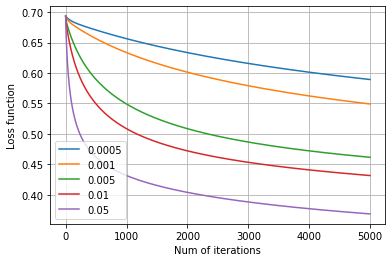

The best accuracy was achieved with a highest learning rate = 0.05.
With the smaller learning rate accuracy becomes lower


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

rates = [0.0005, 0.001, 0.005, 0.01, 0.05]
arr_costs = []

for lr in rates:
  d = model(train_data, train_labels, test_data, test_labels, num_iterations = 5000, learning_rate = lr, print_cost = True)
  costs = []
  iterations = []
  for i in range(len(d['costs'])):
    costs.append(float(d['costs'][i]))
    iterations.append(i)

  arr_costs.append(costs)


for i in range(len(arr_costs)):
    plt.plot(iterations, [pt for pt in arr_costs[i]],label = 'id %s'%i)

plt.legend(['0.0005', '0.001', '0.005', '0.01','0.05'], loc='best')
plt.grid()
plt.ylabel('Loss function')
plt.xlabel('Num of iterations')
plt.show()
print('The best accuracy was achieved with a highest learning rate = 0.05.')
print('With the smaller learning rate accuracy becomes lower')

The best accuracy on the test sample is 77%



Stochastic gradient descent algorithm 

In [ ]:
def sigmoid(x):
    s = 1./(1.+np.exp(-x))
    return s

def initialize_with_zeros(dimensions):
    w = np.zeros((dimensions, 1))
    b = 0.
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]

    # forward propagation
    X.columns = range(X.shape[1])
    A = sigmoid(np.dot(X.T, w) + b)
    cost = -(1. / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A), axis=0)  # compute cost

    # backward propagation
    i = np.random.randint(0, m)
    a = sigmoid(np.dot(np.expand_dims(X[i], axis=0), w) + b)
    dw = X[i] * (a[0] - Y[i])
    db = (a[0] - Y[i])

    grads = {"dw": dw,
             "db": db}

    return grads, cost[0]

def optimize(w, b, X, Y, number_iterations, learning_rate, print_cost = False):   
    costs = []

    for i in range(number_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        dw = np.array(dw)
        dw = np.expand_dims(dw, axis=0).T
        w = w - learning_rate*dw
        b = b - learning_rate * db[0]

        costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    return params, costs


def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Vector "A" storing predictions of the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_pred[0][i]=0
        else:
            Y_pred[0][i]=1
    
    return Y_pred


def model(X_train, Y_train, X_test, Y_test, number_iterations = 3000, learning_rate = 0.001, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # Initialization of the parameters
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent calling
    parameters, costs = optimize(w, b, X_train, Y_train, number_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_pred_test = predict(w, b, X_test)
    Y_pred_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": number_iterations}
    
    return d

In [ ]:
d = model(train_data, train_labels, test_data, test_labels, number_iterations = 3000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.697244
Cost after iteration 200: 0.635600
Cost after iteration 300: 0.601910
Cost after iteration 400: 0.766947
Cost after iteration 500: 0.519968
Cost after iteration 600: 0.504312
Cost after iteration 700: 0.568128
Cost after iteration 800: 0.432608
Cost after iteration 900: 0.589913
Cost after iteration 1000: 0.757630
Cost after iteration 1100: 0.591795
Cost after iteration 1200: 0.569519
Cost after iteration 1300: 0.658014
Cost after iteration 1400: 0.662708
Cost after iteration 1500: 0.539814
Cost after iteration 1600: 0.671346
Cost after iteration 1700: 0.703442
Cost after iteration 1800: 0.668840
Cost after iteration 1900: 0.565262
Cost after iteration 2000: 0.692975
Cost after iteration 2100: 0.761412
Cost after iteration 2200: 0.639897
Cost after iteration 2300: 0.561655
Cost after iteration 2400: 0.668693
Cost after iteration 2500: 0.647256
Cost after iteration 2600: 0.628805
Cost after iteration 2700: 0.580895
Cost

Plot the learning rate curves in the dependence on the number of iterations for SGD algorithm

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.613572
Cost after iteration 200: 0.584356
Cost after iteration 300: 0.538344
Cost after iteration 400: 0.647615
Cost after iteration 500: 0.587260
Cost after iteration 600: 0.638298
Cost after iteration 700: 0.708932
Cost after iteration 800: 0.632264
Cost after iteration 900: 0.620165
Cost after iteration 1000: 0.654407
Cost after iteration 1100: 0.647775
Cost after iteration 1200: 0.701634
Cost after iteration 1300: 0.676471
Cost after iteration 1400: 0.637513
Cost after iteration 1500: 0.597590
Cost after iteration 1600: 0.624884
Cost after iteration 1700: 0.655273
Cost after iteration 1800: 0.652897
Cost after iteration 1900: 0.623856
Cost after iteration 2000: 0.595464
Cost after iteration 2100: 0.585006
Cost after iteration 2200: 0.595175
Cost after iteration 2300: 0.561846
Cost after iteration 2400: 0.602979
Cost after iteration 2500: 0.618799
Cost after iteration 2600: 0.658411
Cost after iteration 2700: 0.619108
Cost

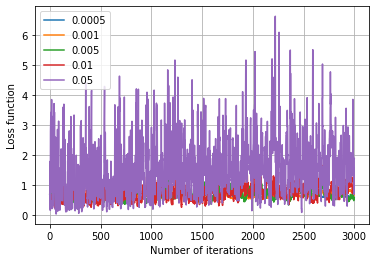

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

rates = [0.0005, 0.001, 0.005, 0.01, 0.05]
arr_costs = []
for lr in rates:
  d = model(train_data, train_labels, test_data, test_labels, number_iterations = 3000, learning_rate = lr, print_cost = True)
  costs = []
  itterations = []
  for i in range(len(d['costs'])):
    costs.append(float(d['costs'][i]))
    itterations.append(i)

  arr_costs.append(costs)


for i in range(len(arr_costs)):
    plt.plot(itterations, [pt for pt in arr_costs[i]],label = 'id %s'%i)

plt.legend(['0.0005', '0.001', '0.005', '0.01', '0.05'], loc='best')
plt.grid()
plt.ylabel('Loss function')
plt.xlabel('Number of iterations')
plt.show()
# For SGD the worst result in accuracy with the learning rate = 0.0001
# The best accuracy with 3000 iterations with learning rate = 0.01
# Average results for SGD are  worse than for for Classical Grad. Descent

Stochastic gradient descent with any learning rate is worse than the best of the classical in terms of accuracy on the test sample

Adam Optimization Algorithm for logistic regression

In [ ]:
def sigmoid(x):
    s = 1./(1.+np.exp(-x))
    return s

def initialize_with_zeros(dimensions):
    w = np.zeros((dimensions,1))
    b = 0.
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # forward propagation
    A = sigmoid(np.dot(w.T,X)+b )                               
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # backward propagation
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


def optimize(w, b, X, Y, number_iterations, learning_rate, print_cost = False):   
    costs = []

    #initialize the G.D with Momentum, RMS prop
    vd_x = 0
    sd_x = 0
    
    vd_y = 0
    sd_y = 0
    batch_size=10
    beta1 = 0.9
    beta2 = 0.99
    e = 10**-8

    t = 1
    for i in range(number_iterations):
                
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        dw = dw / batch_size
        db = db / batch_size
        #Peform gradient descent with momentum using beta1
        vd_x = beta1 * vd_x + ((1-beta1) * dw)

        #Get rms prop value on the derivative using beta2
        sd_x = beta2 * sd_x + ((1-beta2) * (dw * dw))

        #Add bias correction 
        vd_x = vd_x / (1-(beta1)**t)
        sd_x = sd_x / (1-(beta2)**t)

        #combine both RMS prop value and gradient descent momentum 
        nd_x = vd_x / np.sqrt(sd_x + e)

        # get your new value of x and y
        w = w - (learning_rate * nd_x)
        b = b - learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

        t = t + 1

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_pred[0][i]=0
        else:
            Y_pred[0][i]=1
    
    return Y_pred

# model
def model(X_train, Y_train, X_test, Y_test, number_iterations = 15000, learning_rate = 0.01, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, number_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_pred_test = predict(w, b, X_test)
    Y_pred_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": number_iterations}
    
    return d

In [ ]:
d = model(train_data, train_labels, test_data, test_labels, number_iterations = 15000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.878083
Cost after iteration 200: 0.871550
Cost after iteration 300: 0.865204
Cost after iteration 400: 0.859045
Cost after iteration 500: 0.853066
Cost after iteration 600: 0.847266
Cost after iteration 700: 0.841641
Cost after iteration 800: 0.836187
Cost after iteration 900: 0.830900
Cost after iteration 1000: 0.825778
Cost after iteration 1100: 0.820816
Cost after iteration 1200: 0.816010
Cost after iteration 1300: 0.811357
Cost after iteration 1400: 0.806854
Cost after iteration 1500: 0.802497
Cost after iteration 1600: 0.798281
Cost after iteration 1700: 0.794204
Cost after iteration 1800: 0.790262
Cost after iteration 1900: 0.786451
Cost after iteration 2000: 0.782768
Cost after iteration 2100: 0.779209
Cost after iteration 2200: 0.775772
Cost after iteration 2300: 0.772451
Cost after iteration 2400: 0.769245
Cost after iteration 2500: 0.766149
Cost after iteration 2600: 0.763161
Cost after iteration 2700: 0.760278
Cost

Learning curves for Adam algorithm

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.878083
Cost after iteration 200: 0.871550
Cost after iteration 300: 0.865204
Cost after iteration 400: 0.859045
Cost after iteration 500: 0.853066
Cost after iteration 600: 0.847266
Cost after iteration 700: 0.841641
Cost after iteration 800: 0.836187
Cost after iteration 900: 0.830900
Cost after iteration 1000: 0.825778
Cost after iteration 1100: 0.820816
Cost after iteration 1200: 0.816010
Cost after iteration 1300: 0.811357
Cost after iteration 1400: 0.806854
Cost after iteration 1500: 0.802497
Cost after iteration 1600: 0.798281
Cost after iteration 1700: 0.794204
Cost after iteration 1800: 0.790262
Cost after iteration 1900: 0.786451
Cost after iteration 2000: 0.782768
Cost after iteration 2100: 0.779209
Cost after iteration 2200: 0.775772
Cost after iteration 2300: 0.772451
Cost after iteration 2400: 0.769245
Cost after iteration 2500: 0.766149
Cost after iteration 2600: 0.763161
Cost after iteration 2700: 0.760278
Cost

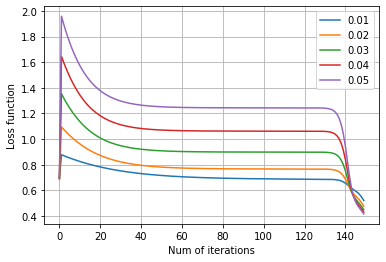

In [ ]:
rates = [0.01,0.02,0.03,0.04,0.05]
for i in range(len(rates)):
  d = model(train_data, train_labels, test_data, test_labels, number_iterations = 15000, learning_rate = rates[i], print_cost = True)
  plt.plot(range(int(d['num_iterations']/100)),d['costs'],label = 'id %s'%i)
plt.legend(['0.01','0.02','0.03','0.04','0.05'], loc='best')
plt.grid()
plt.ylabel('Loss function')
plt.xlabel('Num of iterations')
plt.show()

As a result of the laboratory work classical gradient descent showed the best results in terms of accuracy on the test sample exual to 77% with the learning rate = 0.01